In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#importing the necessary libraries

In [2]:
df = pd.read_csv("segmentation data.csv")
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [3]:
# Check for missing values
print(df.isnull().sum())

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [4]:
# Summary statistics
print(df.describe())


                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000        

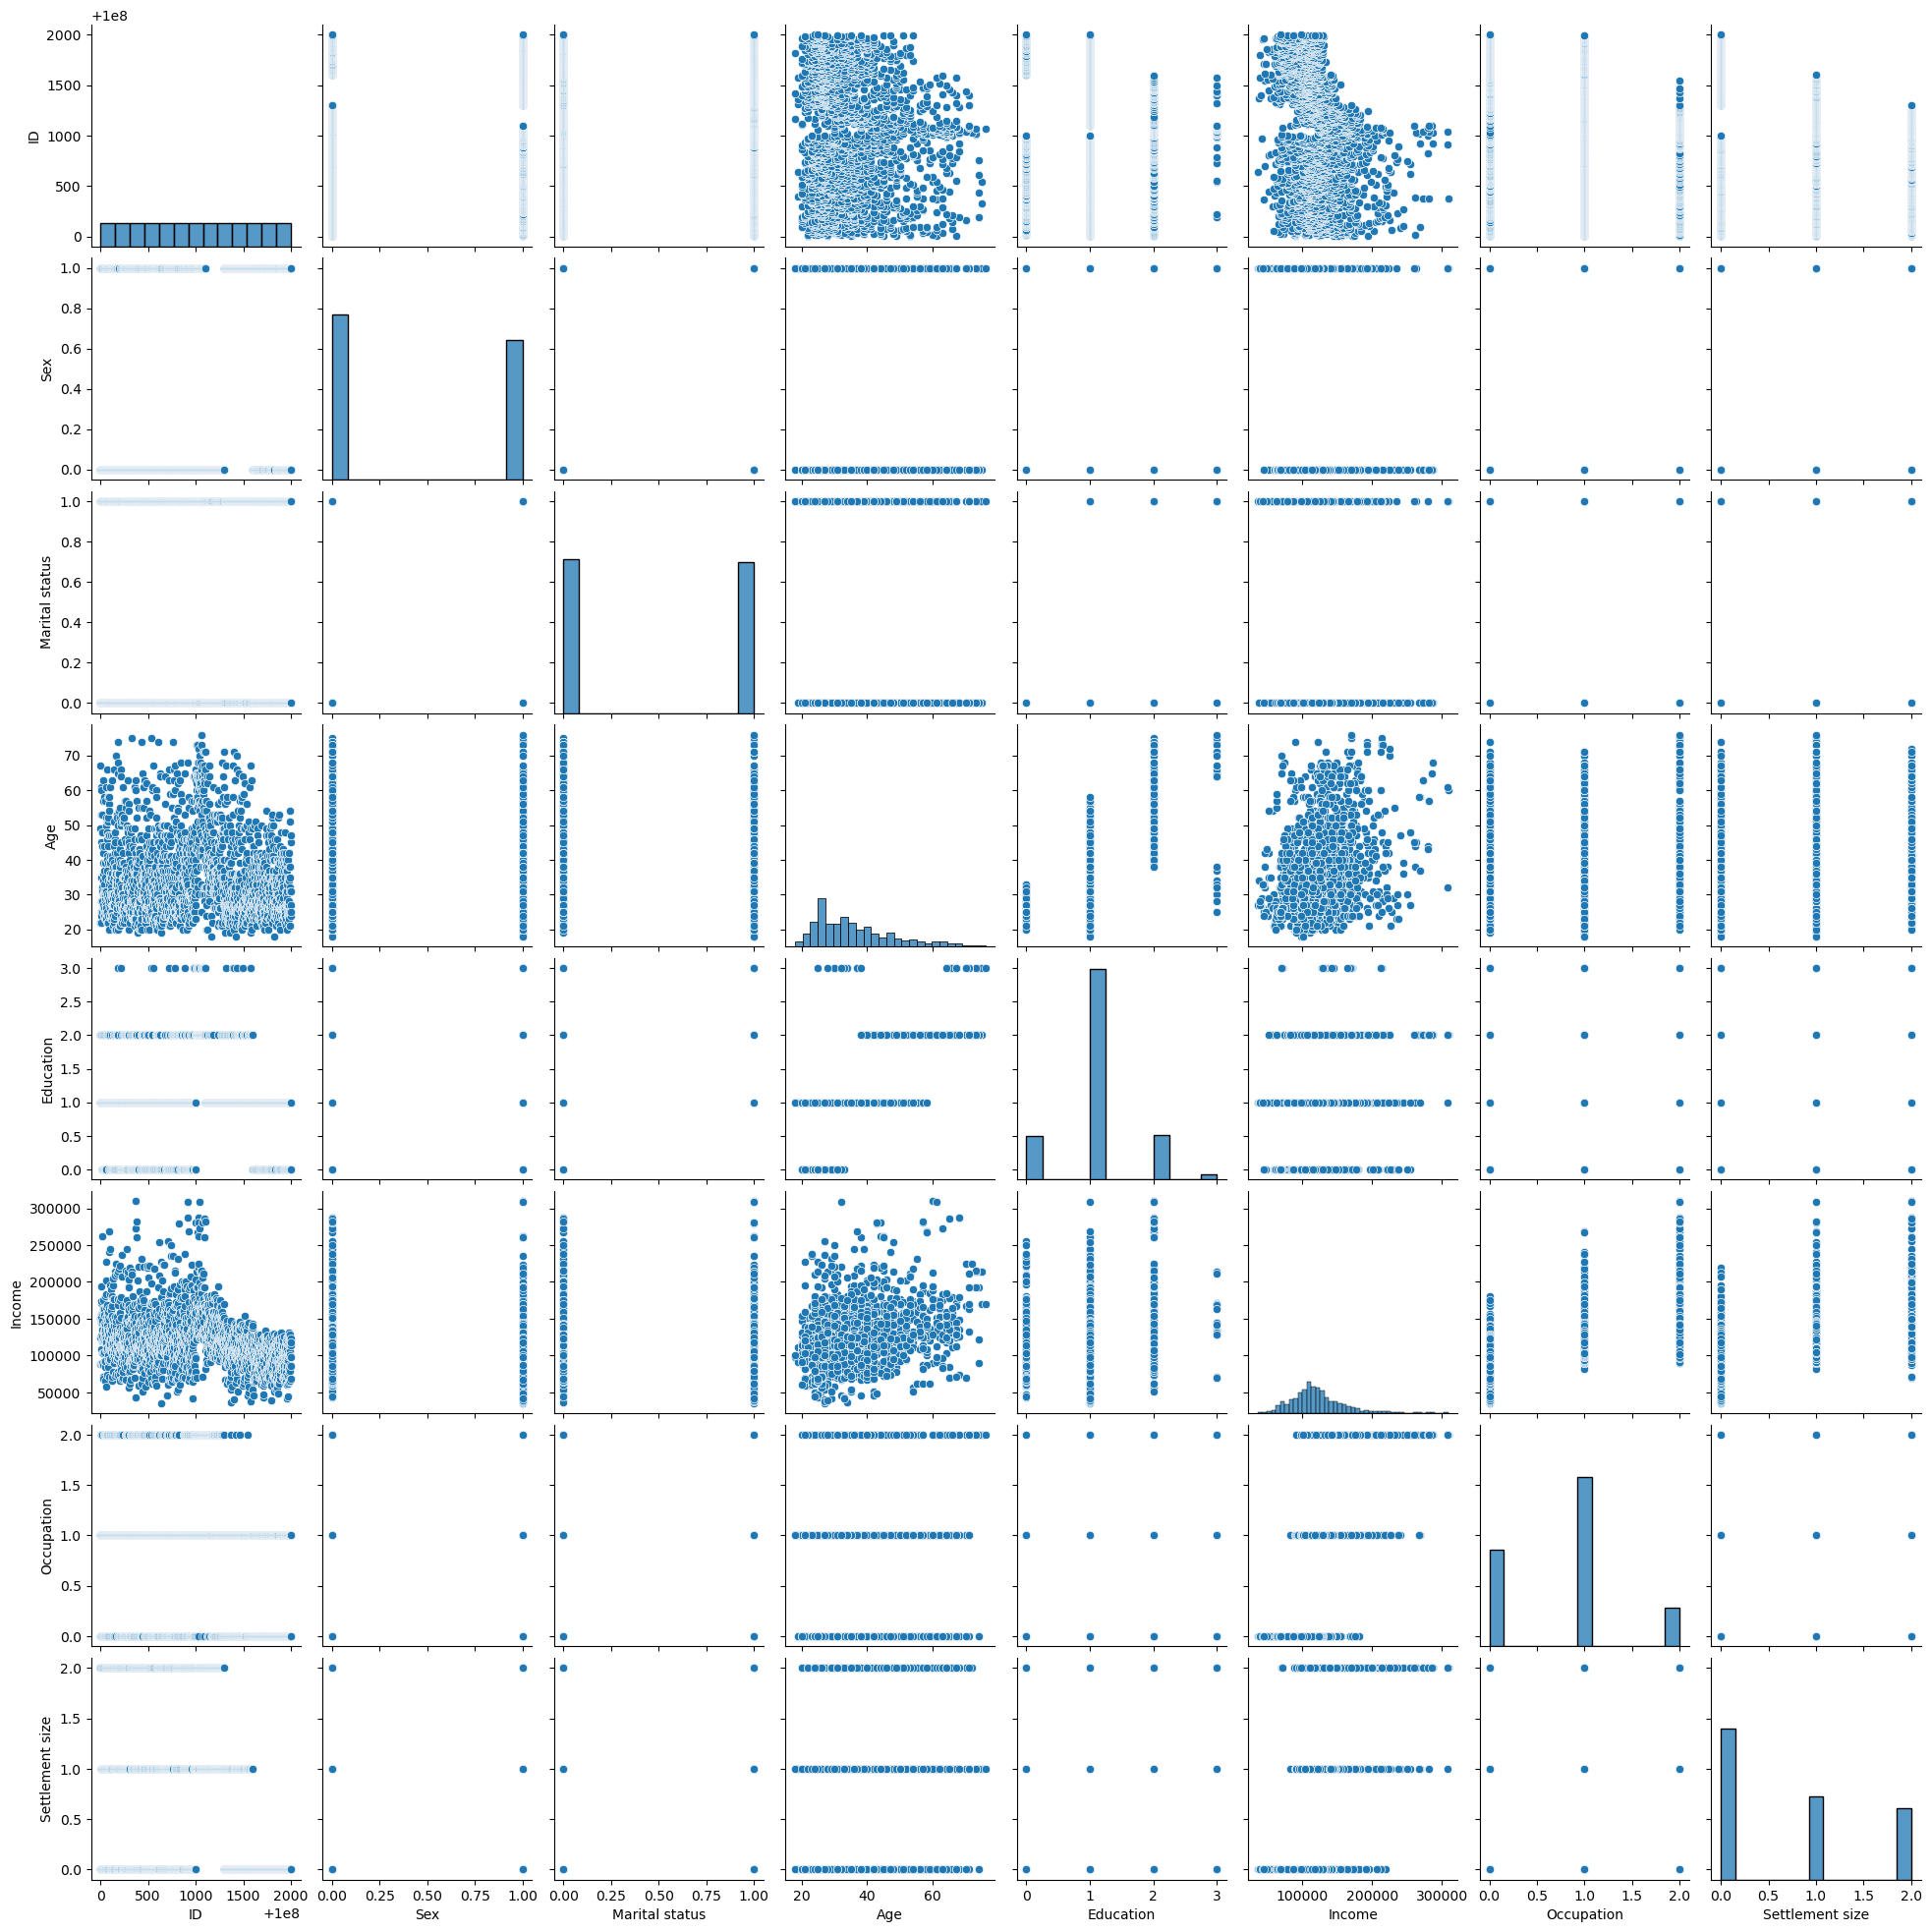

In [5]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

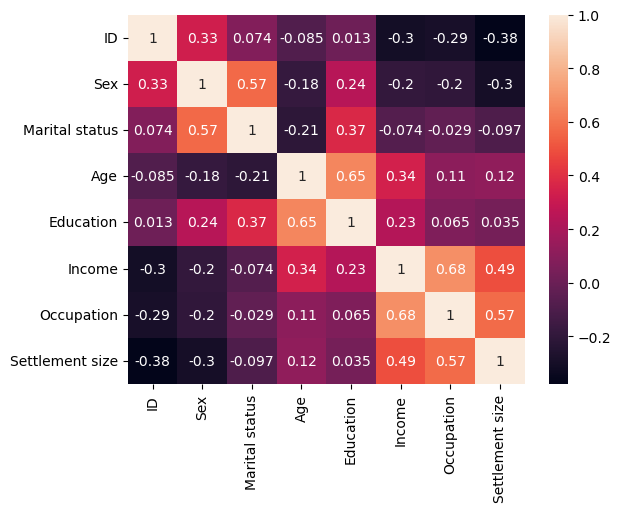

In [6]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#Creating new features or normalizing existing ones
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [9]:
data_scaled

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [10]:
# Convert back to DataFrame for convenience
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)

In [11]:
data_scaled

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...,...
1995,1.724257,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.725989,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,1.727721,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.729453,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [12]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


Using KMeans to Segment Customers
Here, the elbow method is used to determine the optimal number of clusters.

c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

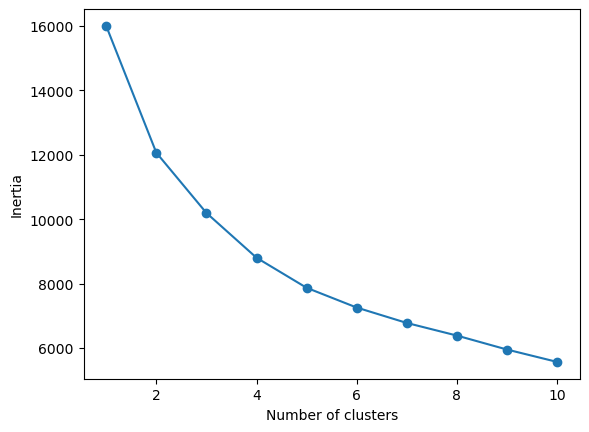

In [13]:
inertia = []

for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


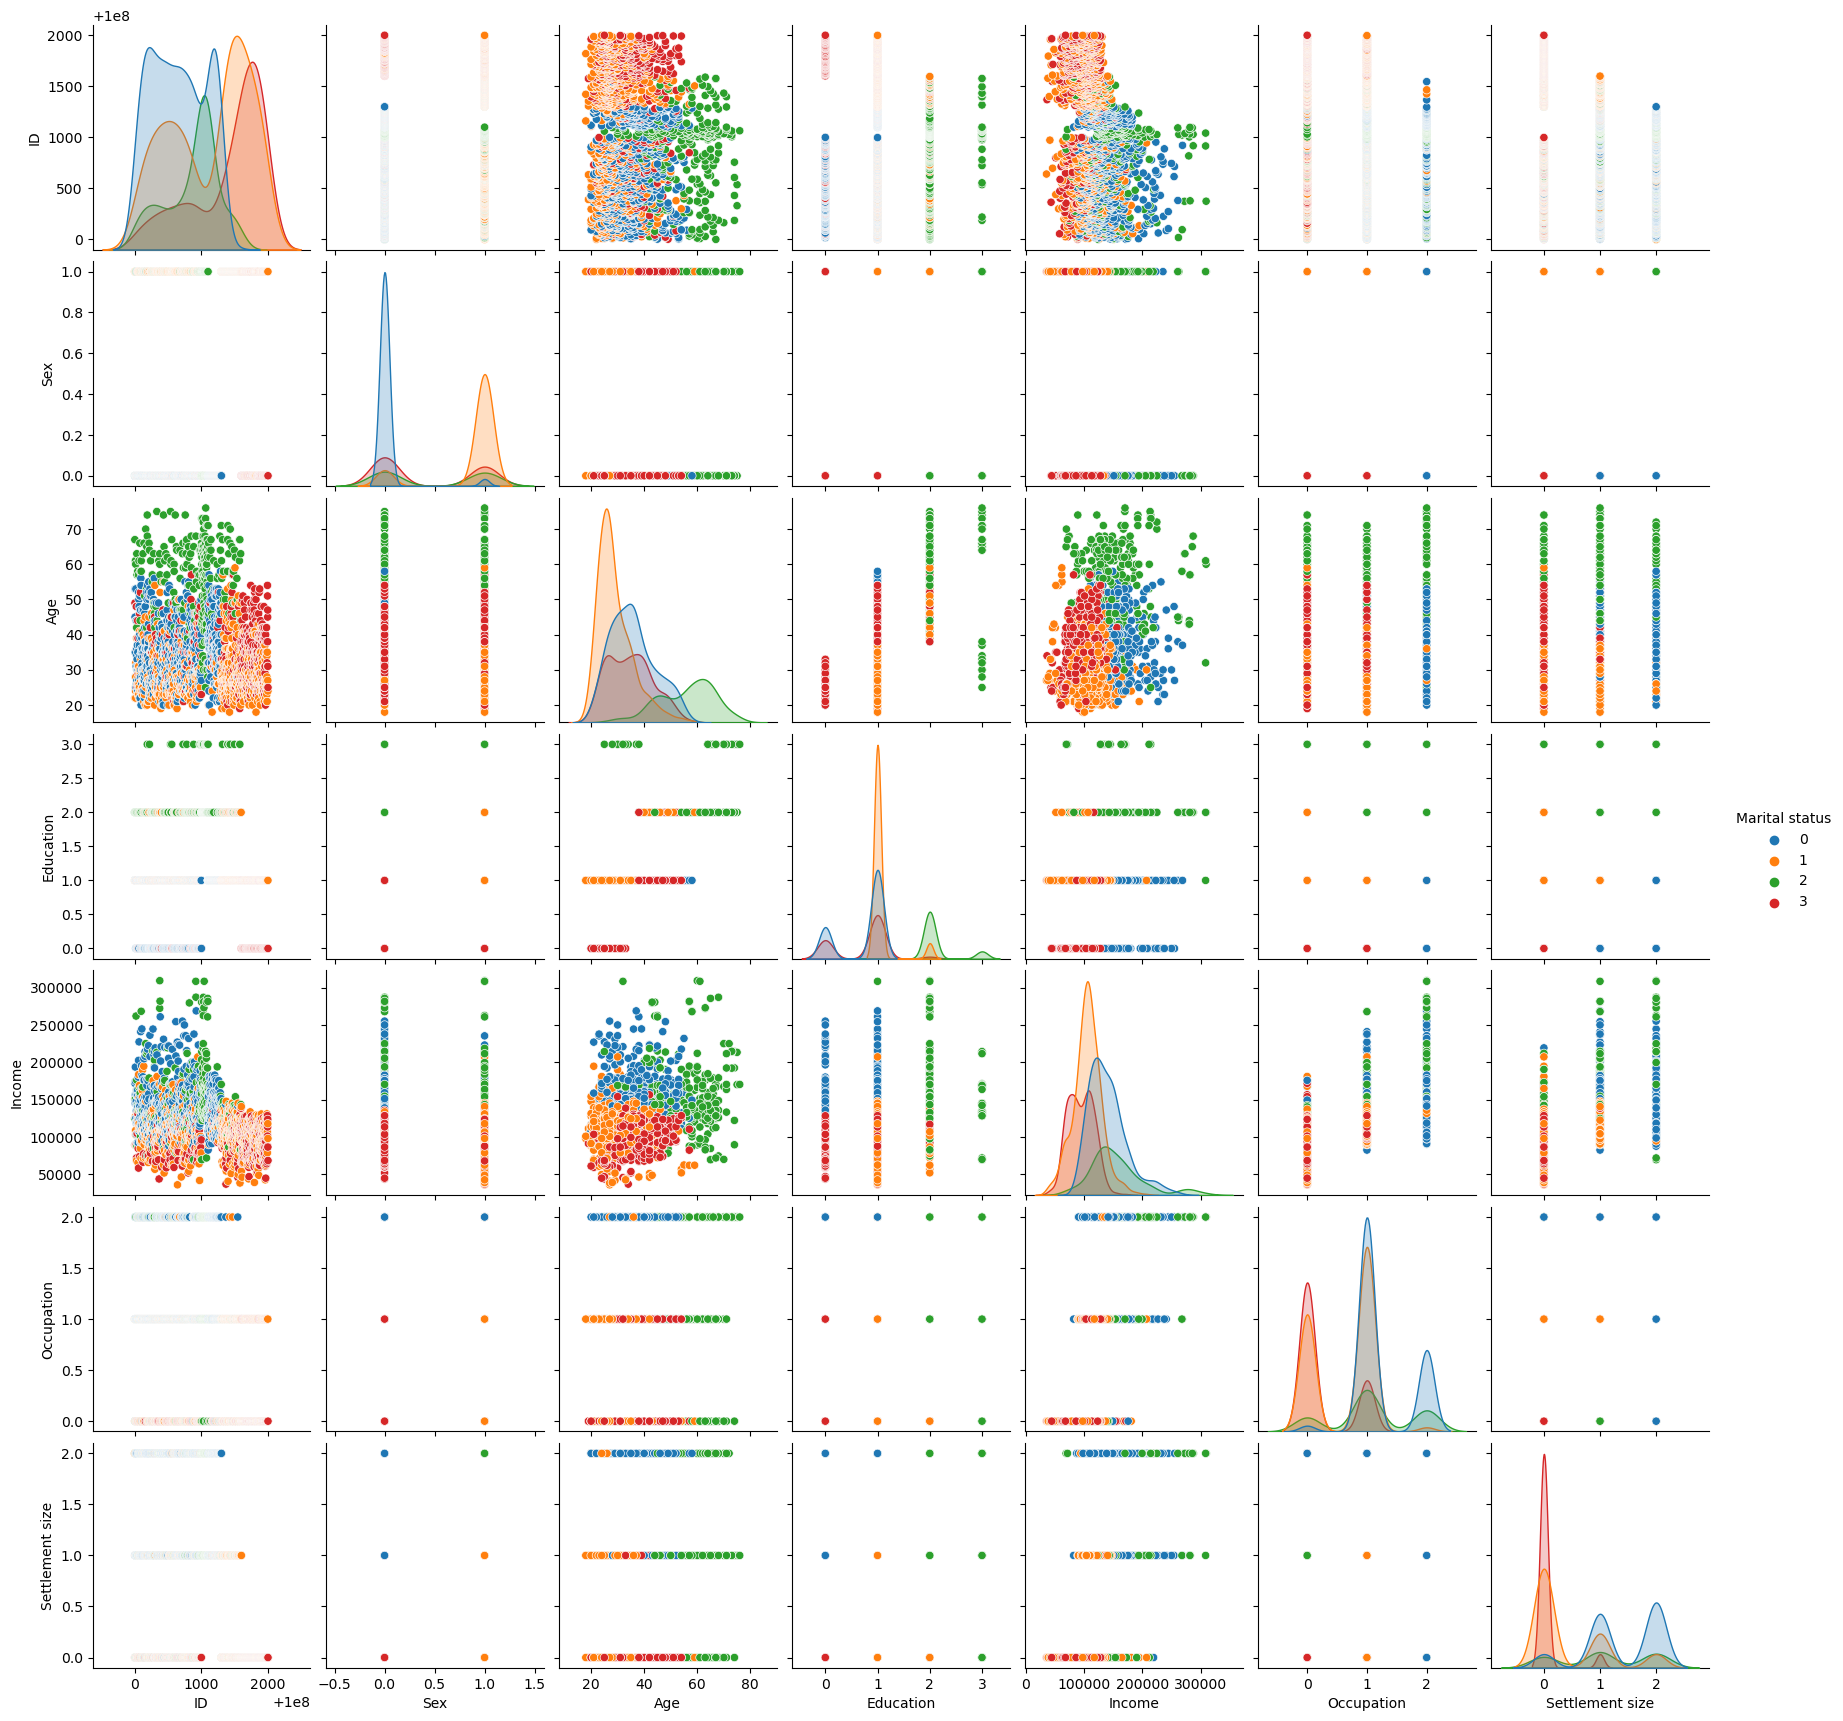

In [14]:
# Fit KMeans with the optimal number of clusters
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Marital status'] = kmeans.fit_predict(data_scaled)


# Visualize the clusters
sns.pairplot(df, hue='Marital status', palette='tab10')
plt.show()

Model Selection 

In [15]:
x = df.drop('Marital status', axis=1)
y = df['Marital status']


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Fit the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train) 

LogisticRegression()

In [17]:
# Make predictions on the test set
predictions = model.predict(x_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('The Model Accuracy is:', accuracy)  

The Model Accuracy is: 0.4925


In [19]:
# Classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.67      0.59       119
           1       0.48      0.70      0.57       152
           2       0.45      0.12      0.19        42
           3       0.33      0.06      0.10        87

    accuracy                           0.49       400
   macro avg       0.45      0.39      0.36       400
weighted avg       0.46      0.49      0.43       400



In [20]:
# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [21]:
# Make predictions on the test set
predictions = knn.predict(x_test)


# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('The Model Accuracy is:', accuracy)

The Model Accuracy is: 0.4975


In [22]:
# Classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       119
           1       0.50      0.47      0.49       152
           2       0.38      0.19      0.25        42
           3       0.50      0.37      0.42        87

    accuracy                           0.50       400
   macro avg       0.47      0.44      0.44       400
weighted avg       0.49      0.50      0.48       400



In [23]:
# Fit the SVM model
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [24]:
# Make predictions on the test set
predictions = svm.predict(x_test)  

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print('The Model Accuracy is:', accuracy)

The Model Accuracy is: 0.38


In [25]:
# Classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       119
           1       0.38      1.00      0.55       152
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        87

    accuracy                           0.38       400
   macro avg       0.10      0.25      0.14       400
weighted avg       0.14      0.38      0.21       400



c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ibrahim sadiq\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# using grid search to find the best parameters
# defining parameter range
parameters = [{'C': [1, 10, 100, 1000], 
               'kernel': ['linear'],},
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]

In [27]:
# using 10-fold cross validation
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [1]:
# fitting the grid search to the training set
grid_search.fit(x_train, y_train)


NameError: name 'grid_search' is not defined

This is where i have worked up to